In [1]:
# in this notebook we will perform EDA and feature engineering on the dataset.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset
df = pd.read_excel('data/ENB2012_data.xlsx')

In [4]:
# check the shape of the dataset
print('Shape of the dataset: ', df.shape)

Shape of the dataset:  (768, 10)


In [5]:
# We have 768 rows and 10 columns in the dataset.

In [6]:
# check the head of the dataset
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Additional Information
    The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.
    Specifically:
    X1	Relative Compactness
    X2	Surface Area
    X3	Wall Area
    X4	Roof Area
    X5	Overall Height
    X6	Orientation
    X7	Glazing Area
    X8	Glazing Area Distribution
    y1	Heating Load
    y2	Cooling Load

In [7]:
# there are no column names in the dataset. So, we will add the column names to the dataset.

# add column names to the dataset
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

# check the head of the dataset
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# now it is looking good. Let's check the information about the dataset.

# check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
# we can see that there are no missing values in the dataset. So, we can proceed further.

In [10]:
# check for duplicate values in the dataset
df.duplicated().sum()

0

no duplicate values in the dataset.

In [11]:
# check the statistical information about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [12]:
# Inference:
# 1. The values of Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Heating Load and Cooling Load are continuous values.
# 2. The values of Orientation, Glazing Area and Glazing Area Distribution are discrete values.

From the field specilist we got to know that the SI units of the features are as follows:

    1. Relative Compactness: unitless
    2. Surface Area: m2
    3. Wall Area: m2
    4. Roof Area: m2
    5. Overall Height: m
    6. Orientation: unitless
    7. Glazing Area: m2
    8. Glazing Area Distribution: unitless
    9. Heating Load: kWh/m2
    10. Cooling Load: kWh/m2

In [13]:
# check the correlation of the features with heating load and not considering the cooling load
df.corr()['Heating_Load'][:-1]

Relative_Compactness         0.622272
Surface_Area                -0.658120
Wall_Area                    0.455671
Roof_Area                   -0.861828
Overall_Height               0.889430
Orientation                 -0.002587
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Heating_Load                 1.000000
Name: Heating_Load, dtype: float64

# Inferece:
    1. Orientation and Glazing Area Distribution has very less correlation with Heating Load.
    2. All other features have good correlation with Heating Load.

In [16]:
# check the correlation of the features with cooling load and not considering the heating load
df.corr()['Cooling_Load']

Relative_Compactness         0.634339
Surface_Area                -0.672999
Wall_Area                    0.427117
Roof_Area                   -0.862547
Overall_Height               0.895785
Orientation                  0.014290
Glazing_Area                 0.207505
Glazing_Area_Distribution    0.050525
Heating_Load                 0.975862
Cooling_Load                 1.000000
Name: Cooling_Load, dtype: float64

# Inference:
    1. Similar to results of heating load.

In [17]:
# check the correlation of heating load and cooling load
df['Heating_Load'].corr(df['Cooling_Load'])

0.9758617391437691

Inference: Very high correlation means as the heating load increases the cooling load also increases.

In [18]:
# Lets perform some visualization on the dataset.

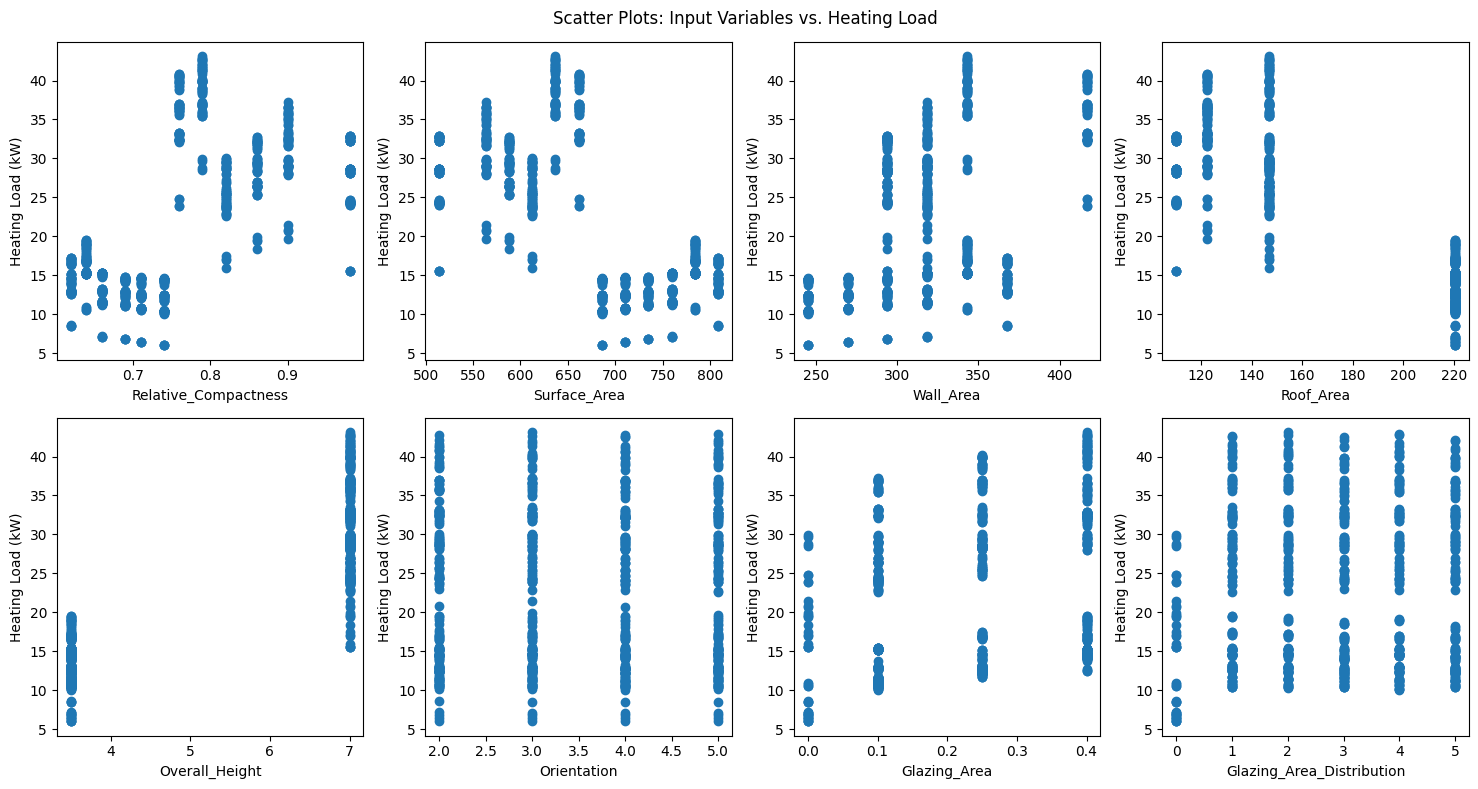

In [20]:
# create a matrix of scatter plots between input features and output features

# input features
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']

# output feature
target = ['Heating_Load']

# create a matrix of scatter plots
# Set up subplots
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Scatter Plots: Input Variables vs. Heating Load')

# Create scatter plots for each input variable
for i, var in enumerate(features):
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    
    x = df[var]
    y = df[target]
    
    axs[row, col].scatter(x, y)
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Heating Load (kW)')

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

In [21]:
# check the value counts of each column
for col in df.columns:
    print(df[col].value_counts())
    print()

0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative_Compactness, dtype: int64

514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface_Area, dtype: int64

294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall_Area, dtype: int64

220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof_Area, dtype: int64

7.0    384
3.5    384
Name: Overall_Height, dtype: int64

2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing_Area, dtype: int64

1    144
2    144
3    144
4    144
5    144
0     48
Name: Glazing_Area_Distribution, dtype: int64

15.16    6
13.00    5
15.23    4
28.15    4
14.60    4
        ..
33.21    1
36.77    1
36.71    1
37.03    1
16.64    1
Name: He

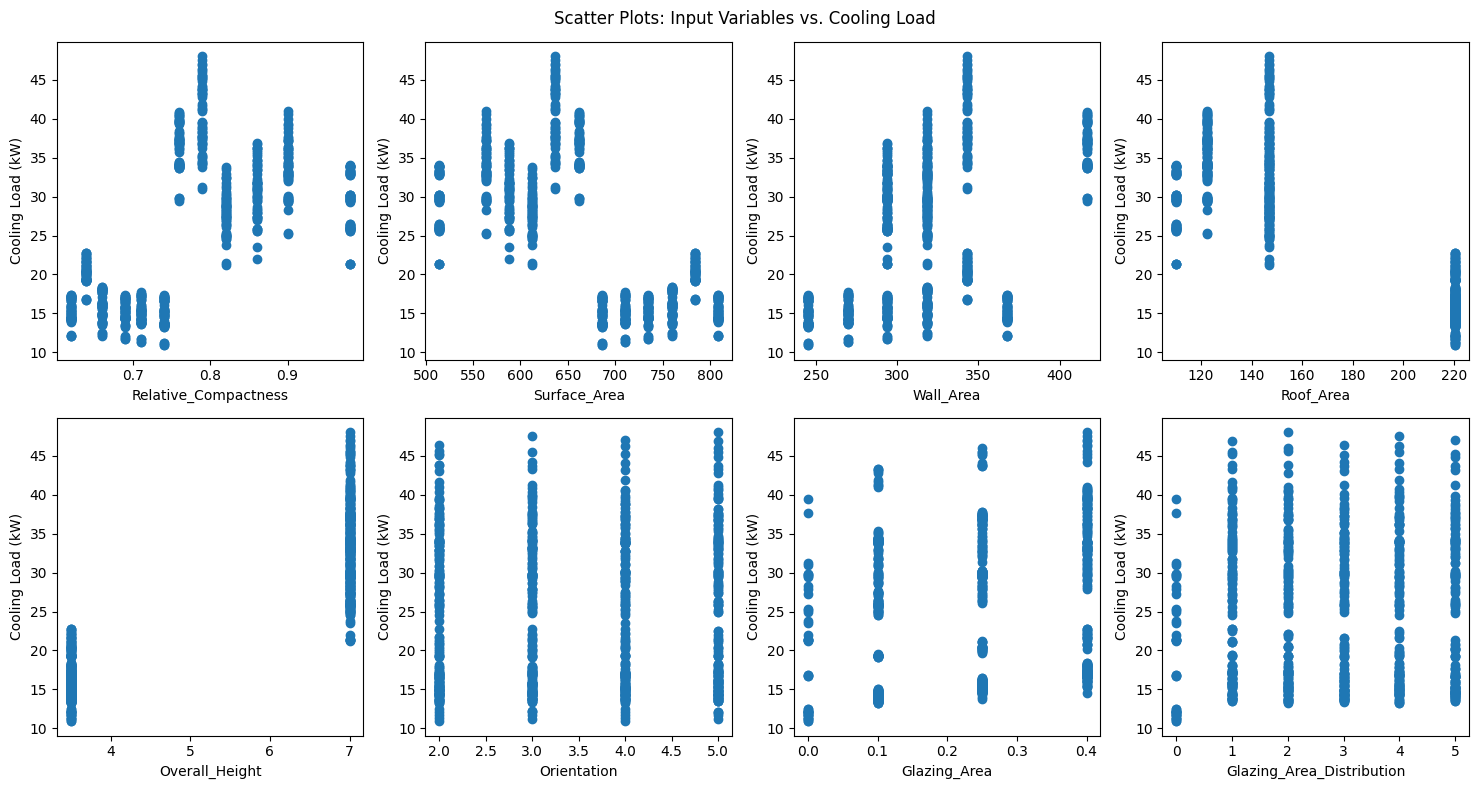

In [22]:
target2 = ['Cooling_Load']

# create a matrix of scatter plots
# Set up subplots
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Scatter Plots: Input Variables vs. Cooling Load')

# Create scatter plots for each input variable
for i, var in enumerate(features):
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    
    x = df[var]
    y = df[target2]
    
    axs[row, col].scatter(x, y)
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Cooling Load (kW)')

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

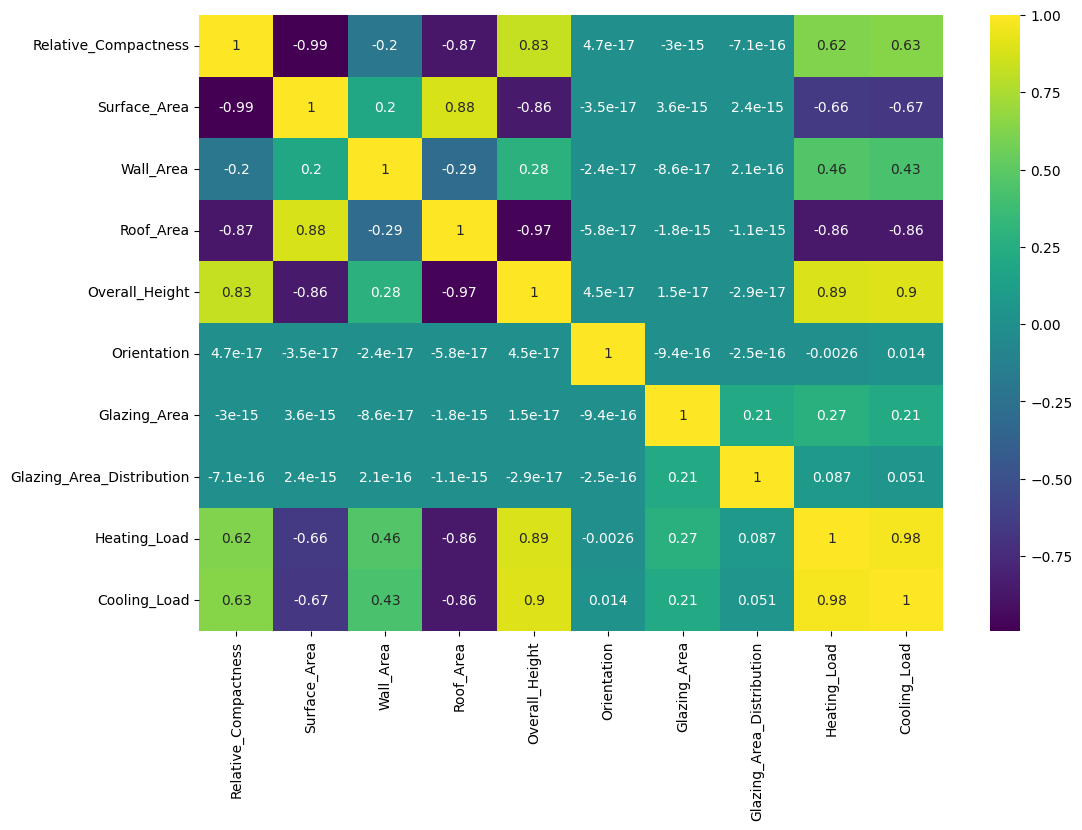

In [23]:
# coorelation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [24]:
# Inference from the heatmap:
# 1. The values of Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Heating Load and Cooling Load are highly correlated with each other.
# 2. The values of Orientation, Glazing Area and Glazing Area Distribution are not correlated with each other.

In [25]:
# save the dataset
df.to_csv('data/ENB2012_data_new.csv', index=False)